# **Traffic Sign Recognition**

### Traffic-sign recognition is a safety tech system that recognizes traffic signs and relays the information displayed on the sign to the driver through the instrument cluster, infotainment screen, or head-up display. This model is based on **Deep Learning using CNN and Keras**. The dataset which is used to develop this model is-
### **GTSRB - German Traffic Sign Recognition Benchmark** which is a multi-class and single image classification.
#### **Dataset** : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/code?datasetId=82373&searchQuery=cnn

### The Image dataset consists of 43 classes (Unique traffic sign images). Training Set has 34799 Images , Test set has 12630 images and the validation set has 4410 images.

## **Importing necessary libraries**

In [32]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## **Loading the Dataset**

In [9]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()   

for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


### **Converting lists into numpy arrays**

In [10]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


## **Splitting the dataset into Traning and Testing data**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### **Converting the labels into one-hot ncoding**

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## **Creating a Model**

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())                                           
model.add(Dense(190, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## **Training the Model**

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 12
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/12
981/981 [==============================] - 82s 82ms/step - loss: 0.2808 - accuracy: 0.9236 - val_loss: 0.1059 - val_accuracy: 0.9700
Epoch 2/12
981/981 [==============================] - 81s 82ms/step - loss: 0.2719 - accuracy: 0.9238 - val_loss: 0.1295 - val_accuracy: 0.9630
Epoch 3/12
981/981 [==============================] - 81s 82ms/step - loss: 0.2721 - accuracy: 0.9254 - val_loss: 0.0781 - val_accuracy: 0.9802
Epoch 4/12
981/981 [==============================] - 80s 82ms/step - loss: 0.2508 - accuracy: 0.9307 - val_loss: 0.0730 - val_accuracy: 0.9799
Epoch 5/12
981/981 [==============================] - 81s 82ms/step - loss: 0.2556 - accuracy: 0.9304 - val_loss: 0.0709 - val_accuracy: 0.9806
Epoch 6/12
981/981 [==============================] - 80s 82ms/step - loss: 0.2813 - accuracy: 0.9256 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 7/12
981/981 [==============================] - 80s 82ms/step - loss: 0.2561 - accuracy: 0.9316 - val_loss: 0.0551 - val_accuracy:

## **Visualization of Model Accuracy**

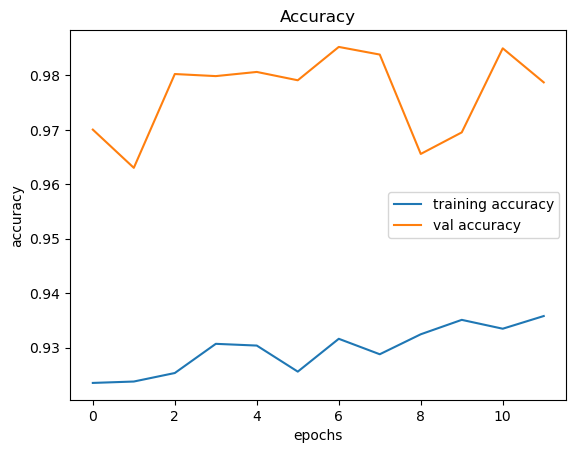

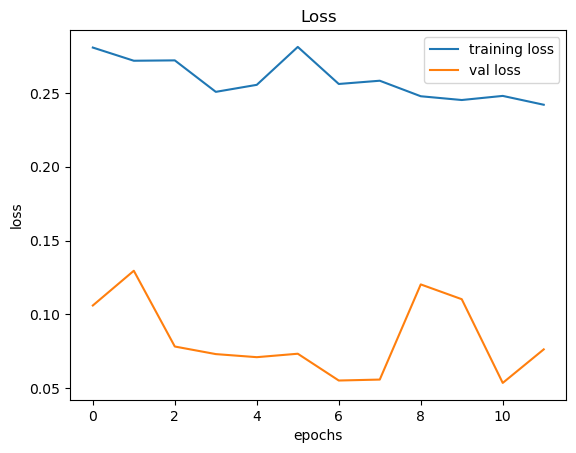

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## **Evaluation of the Model**

In [29]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis = -1)

395/395 [==============================] - 7s 17ms/step


## **Accuracy of the Model**

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))       
model.save("model.h5")

0.9495645288994458
